### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset  

In [2]:
df = pd.read_csv('SavedData/simulated_transaction_2024.csv')

In [3]:
df.head(50)

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.00,1584.00,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.00,1950.00,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.00,-780.00,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.00,780.00,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.00,1825.00,NaN,Fat Face
5,01/01/2023,00:00,203466392.0,4607.66,2841.66,NaN,Lavender Primary
6,01/01/2023,00:00,768271776.0,3620.00,1950.00,NaN,A Cut Above
7,01/01/2023,00:00,768271776.0,2840.00,-780.00,215404070.0,NaN
8,01/01/2023,00:00,215404070.0,1965.00,780.00,768271776.0,NaN
9,01/01/2023,00:00,456221621.0,2831.00,1675.00,NaN,Tesco


### Cleaning the dataset

In [4]:
# Dataset overview
print(df.shape)
df.describe()

(230596, 7)


,Account No,Balance,Amount,Third Party Account No
count,2.303720e+05,230350.000000,230387.000000,6.832000e+03
mean,5.505993e+08,3609.351057,6.437717,5.370263e+08
std,2.560610e+08,5379.331174,508.200101,2.596927e+08
min,1.015313e+08,-5790.983500,-12240.000000,1.019085e+08
25%,3.314502e+08,373.453932,-74.000000,3.114679e+08
50%,5.501698e+08,1686.009850,-28.700000,5.381491e+08
75%,7.682718e+08,5215.031852,-12.060000,7.485097e+08
max,9.997527e+08,46804.158837,12240.000000,9.997527e+08


We can see here that the overall number of rows in the dataframe is 230596, yet from the count row in the describe() table, we see there will be some missing values. 

In [5]:
# Identifying the missing values
sum_missing_values = df.isnull().sum()
sum_missing_values

Date                         229
Timestamp                    251
Account No                   224
Balance                      246
Amount                       209
Third Party Account No    223764
Third Party Name            7079
dtype: int64

I think it is acceptable to remove the rows which contain missing values for Date, Timestamp, Account No, Balance and amount as, even if there is no overlaps between these missing values in the rows (which I will check if there is), these sum to 1159 missing values (229 + 251 + 224 + 246 + 209). This represents 5% of the dataset, which is acceptable to remove. For the Third Party Account No, and the Third Party Name, a row will only be removed if both columns are null. 

In [6]:
# Calculate rows with null values for both 'Third Party Account No' and 'Third Party Name'
null_third_party = df[df['Third Party Account No'].isnull() & 
                                              df['Third Party Name'].isnull()]

null_third_party

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
1839,01/01/2023,00:00,221356538.0,714.020000,-100.00,NaN,NaN
2173,01/01/2023,00:00,977899503.0,2521.020000,-12.99,NaN,NaN
2388,01/01/2023,00:00,912584712.0,960.040000,-15.99,NaN,NaN
3027,01/01/2023,00:00,769311479.0,-147.940000,-18.99,NaN,NaN
5214,01/01/2023,12:40,175452235.0,-104.260000,-319.20,NaN,NaN
...,...,...,...,...,...,...,...
228343,03/12/2023,05:58,108481285.0,10767.326581,-2.80,NaN,NaN
228447,03/12/2023,10:17,659415300.0,2695.894296,-5.40,NaN,NaN
228540,03/12/2023,11:26,258201793.0,-444.809800,-40.88,NaN,NaN
229016,04/12/2023,08:34,215426302.0,1118.800404,-43.20,NaN,NaN


A further 247 null rows brings a total of 1406 rows with null values. This is 6% of the data. Need to investigate if there are any duplicates within this.

In [7]:
# Displaying rows with missing values in 'Date', 'Timestamp', 'Account No', 'Balance', and 'Amount'
missing_critical_info = df[df['Date'].isnull() | 
                             df['Timestamp'].isnull() | 
                             df['Account No'].isnull() | 
                             df['Balance'].isnull() | 
                             df['Amount'].isnull()]

# Combine using 'pd.concat', assuming no common rows between the two subsets
combined_null_data = pd.concat([null_third_party, missing_critical_info], axis=0).drop_duplicates()

# Display the combined dataframe
combined_null_data

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
1839,01/01/2023,00:00,221356538.0,714.020000,-100.00,NaN,NaN
2173,01/01/2023,00:00,977899503.0,2521.020000,-12.99,NaN,NaN
2388,01/01/2023,00:00,912584712.0,960.040000,-15.99,NaN,NaN
3027,01/01/2023,00:00,769311479.0,-147.940000,-18.99,NaN,NaN
5214,01/01/2023,12:40,175452235.0,-104.260000,-319.20,NaN,NaN
...,...,...,...,...,...,...,...
229764,05/12/2023,09:17,117273481.0,NaN,-6.15,NaN,Starbucks
229970,05/12/2023,17:43,497772347.0,47.741750,NaN,NaN,Matalan
230045,NaN,19:52,196289502.0,18280.425041,-49.93,NaN,Etsy
230251,06/12/2023,NaN,815385232.0,12245.673605,-2.11,NaN,AMAZON


In [8]:
# Save the combined_null_data dataframe as a CSV file
combined_null_data.to_csv('null_values_dataset2.csv', index=False)


There is a total of 1402 unique rows with null data. It can be interesting to investigate why these rows have null data, perhaps due to the following reasons:

1. **Data Entry Errors:** Manual data entry processes are prone to errors. A field may be left blank accidentally, or an entry might be skipped. This is particularly common in systems where data validation is lax or non-existent.

2. **Missing Information:** At the time of the transaction, some information may not be available or applicable. For example, a transaction might not involve a third party (e.g., a fee applied directly by the bank), resulting in null values in fields like `Third Party Account No` and `Third Party Name`.

3. **Systematic Issues:** Software or systems used for recording transactions might have bugs, glitches, or design limitations that prevent certain information from being recorded. This could lead to systematically missing data in specific fields.

4. **Data Processing and Integration Issues:** When transactional data comes from multiple sources or systems, integration processes might result in missing values. This can happen if different systems have different fields, or if there's a mismatch in how data is mapped and consolidated.

5. **Intentional Placeholder:** Sometimes, null values are used intentionally to indicate that a particular field is not applicable for a specific transaction, rather than an omission or error.

6. **Upgrades or Changes in Data Collection Practices:** If the method or tools for data collection change over time, earlier records might lack information that is only captured due to later updates or changes in policy.

7. **Conditional Fields:** Some fields might only be relevant under specific conditions (e.g., refunds or cancellations might require additional information that is not applicable to other types of transactions).

I will remove them from the dataset to form a `clean_dataset2`, but have saved these null values as a csv file named `null_values_dataset2.csv` to investigate in the future.

In [9]:
# Removing the combined_null_data from the orginal df

# First, we need to identify the rows in 'df' that correspond to those in 'combined_null_data'
# We will use an inner join on key columns to find matching rows that should be removed
key_columns = ['Date', 'Timestamp', 'Account No', 'Balance', 'Amount']
dataset2_cleaned = pd.merge(df, combined_null_data[key_columns], on=key_columns, how='left', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])

dataset2_cleaned.isnull().sum()

Date                           0
Timestamp                      0
Account No                     0
Balance                        0
Amount                         0
Third Party Account No    222389
Third Party Name            6805
dtype: int64

In [10]:
# Checking for duplicates in the cleaned dataframe to ensure all rows are unique
dataset2_cleaned.duplicated().sum()

0

In [11]:
dataset2_cleaned

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.000000,1584.00,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.000000,1950.00,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.000000,-780.00,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.000000,780.00,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.000000,1825.00,NaN,Fat Face
...,...,...,...,...,...,...,...
230591,06/12/2023,20:54,581655972.0,45935.206861,-41.06,NaN,Tesco
230592,06/12/2023,20:55,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local
230593,06/12/2023,21:05,824916823.0,9709.172159,-32.94,NaN,Deliveroo
230594,06/12/2023,21:13,366550080.0,26834.165794,-19.25,NaN,Amazon


### Parsing date and time

In [19]:
# First, ensure 'Date' is in datetime format for manipulation and 'Timestamp' as well
dataset2_cleaned['Date'] = pd.to_datetime(dataset2_cleaned['Date'], dayfirst=True)
dataset2_cleaned['Timestamp'] = pd.to_datetime(dataset2_cleaned['Timestamp'], format='%H:%M').dt.time

# Create a 'Datetime' column that combines 'Date' and 'Timestamp'
dataset2_cleaned['Datetime'] = pd.to_datetime(dataset2_cleaned['Date'].astype(str) + ' ' + dataset2_cleaned['Timestamp'].astype(str))

# Formatting 'Date' back to 'dd/mm/yyyy' string format after manipulation
dataset2_cleaned['Date'] = dataset2_cleaned['Date'].dt.strftime('%d/%m/%Y')

dataset2_cleaned

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime
0,01/01/2023,00:00:00,678330503.0,2971.000000,1584.00,NaN,Westport Care Home,2023-01-01 00:00:00
1,01/01/2023,00:00:00,472213568.0,3792.000000,1950.00,NaN,Barbiee Boutique,2023-01-01 00:00:00
2,01/01/2023,00:00:00,472213568.0,3012.000000,-780.00,283027736.0,NaN,2023-01-01 00:00:00
3,01/01/2023,00:00:00,283027736.0,1787.000000,780.00,472213568.0,NaN,2023-01-01 00:00:00
4,01/01/2023,00:00:00,624500124.0,3226.000000,1825.00,NaN,Fat Face,2023-01-01 00:00:00
...,...,...,...,...,...,...,...,...
230591,06/12/2023,20:54:00,581655972.0,45935.206861,-41.06,NaN,Tesco,2023-12-06 20:54:00
230592,06/12/2023,20:55:00,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local,2023-12-06 20:55:00
230593,06/12/2023,21:05:00,824916823.0,9709.172159,-32.94,NaN,Deliveroo,2023-12-06 21:05:00
230594,06/12/2023,21:13:00,366550080.0,26834.165794,-19.25,NaN,Amazon,2023-12-06 21:13:00


In [20]:
# Save cleaned data to CSV file
dataset2_cleaned.to_csv('dataset2_cleaned.csv', index=False)

## EDA

### Basic Statistics

In [21]:
basic_stats_dataset2 = {
    'Total Transactions': dataset2_cleaned.shape[0],
    'Date Range': f"{dataset2_cleaned['Date'].min()} to {dataset2_cleaned['Date'].max()}",
    'Unique Accounts': dataset2_cleaned['Account No'].nunique(),
    'Unique Third Party Accounts': dataset2_cleaned['Third Party Account No'].nunique(dropna=True),
    'Unique Third Party Names': dataset2_cleaned['Third Party Name'].nunique(dropna=True),
    'Average Balance': dataset2_cleaned['Balance'].mean(),
    'Average Transaction Amount': dataset2_cleaned['Amount'].mean(),
    'Max Transaction Amount': dataset2_cleaned['Amount'].max(),
    'Min Transaction Amount': dataset2_cleaned['Amount'].min()
}

basic_stats_dataset2

{'Total Transactions': 229194,
 'Date Range': '01/01/2023 to 31/10/2023',
 'Unique Accounts': 976,
 'Unique Third Party Accounts': 673,
 'Unique Third Party Names': 83,
 'Average Balance': 3609.2562946910007,
 'Average Transaction Amount': 6.5785616988228295,
 'Max Transaction Amount': 12240.0,
 'Min Transaction Amount': -12240.0}

In [22]:
unique_third_party_names = dataset2_cleaned['Third Party Name'].unique()
print(unique_third_party_names)

['Westport Care Home' 'Barbiee Boutique' nan 'Fat Face' 'Lavender Primary'
 'A Cut Above' 'Tesco' 'Brilliant Brushes' 'Costa Coffee'
 'Premier Finance' 'North Face' 'Craftastic' 'Fitted Stitch' 'Selfridges'
 'Starbucks' 'The Crown' 'Cass Art' 'Green Park Academy' 'Rose & Crown'
 'Kings Arms' 'Sunny Care Nursery' 'A Yarn Story' 'Pets Corner'
 'Lavender Fields' 'Victoria Park' 'Halifax' 'LBG' 'Blizzard' 'Xbox'
 'Mojang Studios' 'PureGym' 'Disney' 'Netflix' 'Grand Union BJJ' 'Amazon'
 'SquareOnix' 'Deliveroo' 'JustEat' 'Coop Local' 'Sainsbury' 'AMAZON'
 'The Works' "Blackwell's" 'Topshop' 'Matalan' 'Foyles' 'Wool'
 'Hobby Lobby' 'Revella' 'Sainsbury Local' 'Loosely Fitted'
 'Stitch By Stitch' 'Coffee #1' 'Hobbycraft' 'Lloyds Pharmacy'
 'Gamestation' 'CeX' 'Etsy' 'Five Senses Art' 'Sports Direct' 'Boots'
 'Reebok' 'JD Sports' 'Head' 'Frankie & Bennies' 'Gap Kids'
 'University College Hospital' 'CPA' 'Happy Days Home' 'Pets at Home'
 'Jollyes' 'Collector Cave' 'Vision Express' 'Green Park'


### Splitting the dataframes into expenditures and payments

In [23]:
# Splitting the dataset2_cleaned dataframe into two based on the condition of the 'Amount' being positive or negative
payments_df = dataset2_cleaned[dataset2_cleaned['Amount'] > 0]
expenditures_df = dataset2_cleaned[dataset2_cleaned['Amount'] < 0]

# Saving these dataframes as CSV files
payments_df.to_csv('dataset2_payments.csv', index=False)
expenditures_df.to_csv('dataset2_expenditures.csv', index=False)

In [24]:
payments_df

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime
0,01/01/2023,00:00:00,678330503.0,2971.000000,1584.00,NaN,Westport Care Home,2023-01-01 00:00:00
1,01/01/2023,00:00:00,472213568.0,3792.000000,1950.00,NaN,Barbiee Boutique,2023-01-01 00:00:00
3,01/01/2023,00:00:00,283027736.0,1787.000000,780.00,472213568.0,NaN,2023-01-01 00:00:00
4,01/01/2023,00:00:00,624500124.0,3226.000000,1825.00,NaN,Fat Face,2023-01-01 00:00:00
5,01/01/2023,00:00:00,203466392.0,4607.660000,2841.66,NaN,Lavender Primary,2023-01-01 00:00:00
...,...,...,...,...,...,...,...,...
227484,01/12/2023,20:32:00,812012103.0,-327.604300,250.00,291580432.0,NaN,2023-12-01 20:32:00
227486,01/12/2023,20:35:00,525524239.0,47.652350,380.00,558875206.0,NaN,2023-12-01 20:35:00
227492,01/12/2023,21:26:00,121113546.0,398.453156,120.00,490790931.0,NaN,2023-12-01 21:26:00
228822,04/12/2023,01:08:00,336171116.0,428.428400,380.00,973388795.0,NaN,2023-12-04 01:08:00


In [25]:
expenditures_df

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name,Datetime
2,01/01/2023,00:00:00,472213568.0,3012.000000,-780.00,283027736.0,NaN,2023-01-01 00:00:00
7,01/01/2023,00:00:00,768271776.0,2840.000000,-780.00,215404070.0,NaN,2023-01-01 00:00:00
11,01/01/2023,00:00:00,350921975.0,1998.500000,-460.00,633362865.0,NaN,2023-01-01 00:00:00
13,01/01/2023,00:00:00,455831435.0,2603.100000,-650.00,442079728.0,NaN,2023-01-01 00:00:00
18,01/01/2023,00:00:00,172084472.0,1149.000000,-1300.00,407574996.0,NaN,2023-01-01 00:00:00
...,...,...,...,...,...,...,...,...
230591,06/12/2023,20:54:00,581655972.0,45935.206861,-41.06,NaN,Tesco,2023-12-06 20:54:00
230592,06/12/2023,20:55:00,786141370.0,-244.837500,-62.35,NaN,Sainsbury Local,2023-12-06 20:55:00
230593,06/12/2023,21:05:00,824916823.0,9709.172159,-32.94,NaN,Deliveroo,2023-12-06 21:05:00
230594,06/12/2023,21:13:00,366550080.0,26834.165794,-19.25,NaN,Amazon,2023-12-06 21:13:00


The payments_df may include: incomes, transfers from friends, refunds
The expendittures_df is much larger (as expected) and might include paying for goods/services, transferring rent, transferring money to friends etc.

### Expenditure: EDA

/var/folders/rw/215myrns4md_n1k8nkyww6mw0000gn/T/ipykernel_30288/1088146248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenditures_df['Datetime'] = pd.to_datetime(expenditures_df['Datetime'])
/var/folders/rw/215myrns4md_n1k8nkyww6mw0000gn/T/ipykernel_30288/1088146248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenditures_df['Date'] = pd.to_datetime(expenditures_df['Date'], dayfirst=True)
/var/folders/rw/215myrns4md_n1k8nkyww6mw0000gn/T/ipykernel_30288/1088146248.py:4: SettingWithCopyWarn

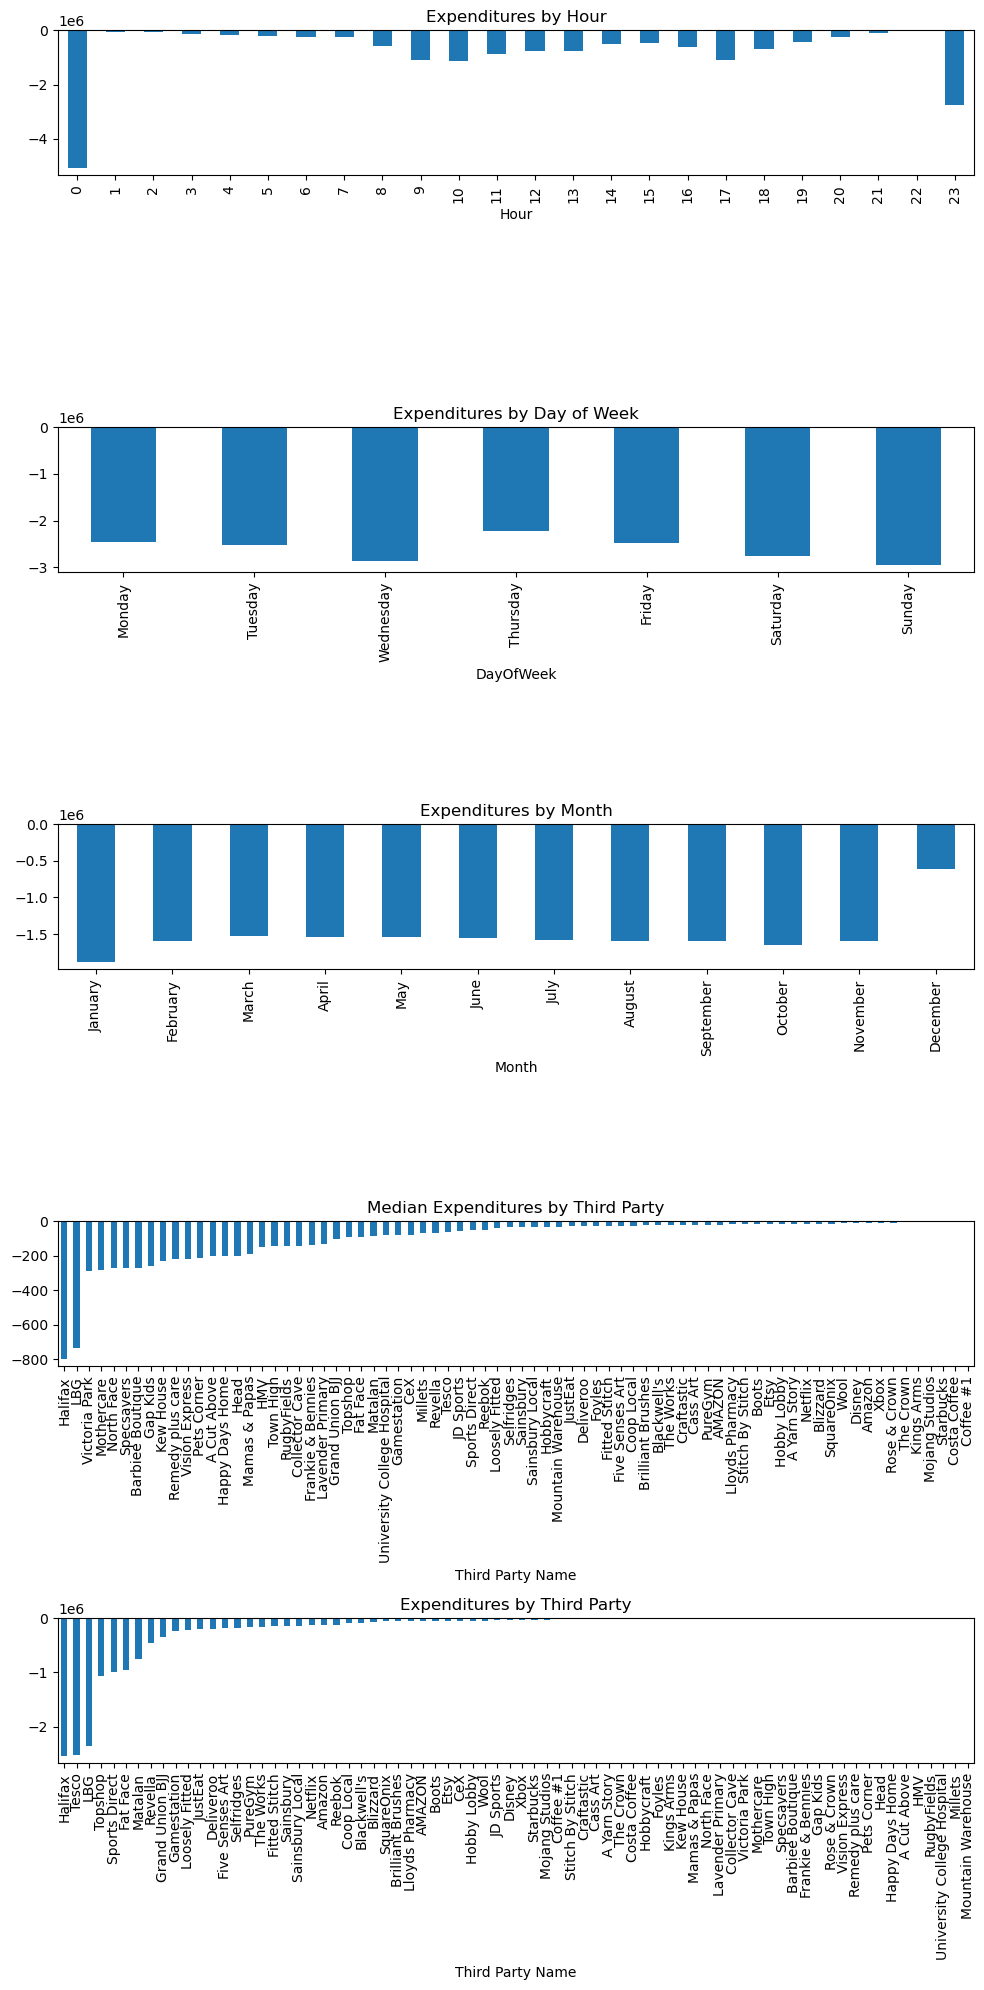

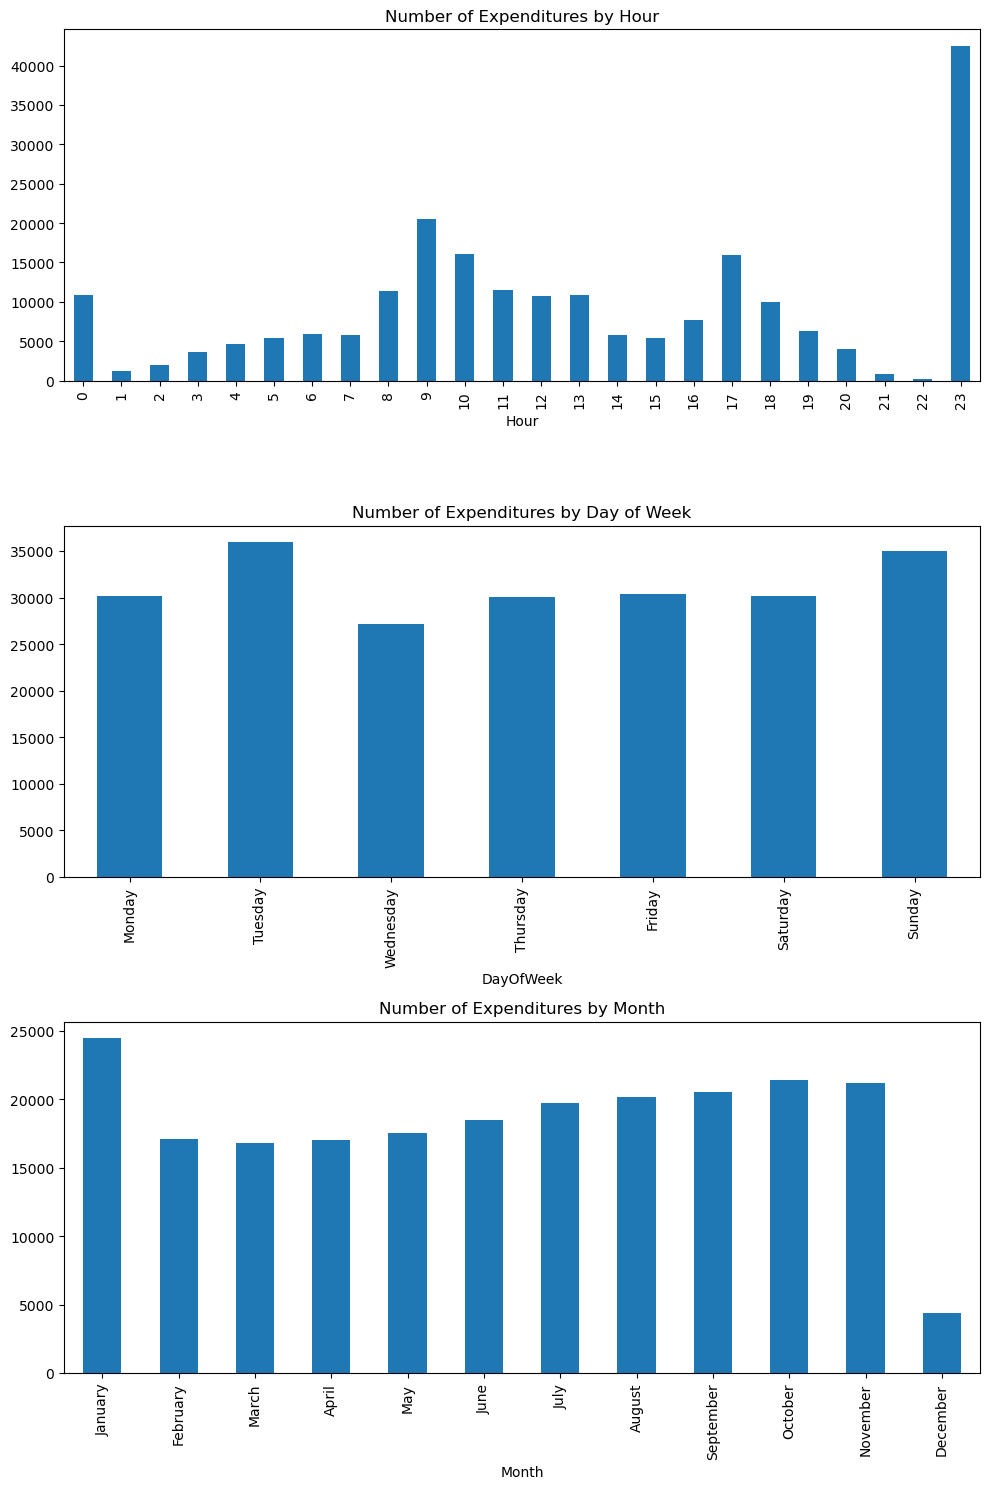

In [33]:
# Formatting datetime information
expenditures_df['Datetime'] = pd.to_datetime(expenditures_df['Datetime'])
expenditures_df['Date'] = pd.to_datetime(expenditures_df['Date'], dayfirst=True)
expenditures_df['Hour'] = expenditures_df['Datetime'].dt.hour
expenditures_df['DayOfWeek'] = expenditures_df['Datetime'].dt.day_name()
expenditures_df['Month'] = expenditures_df['Datetime'].dt.month_name()

# Analysis by Hour, Day of the Week, and Month
expenditures_by_hour = expenditures_df.groupby('Hour')['Amount'].sum()
expenditures_by_day = expenditures_df.groupby('DayOfWeek')['Amount'].sum().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
expenditures_by_month = expenditures_df.groupby('Month')['Amount'].sum().reindex(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

# Analysis by third party business
median_expenditures_third_party = expenditures_df.groupby('Third Party Name')['Amount'].median().sort_values()
expenditures_third_party = expenditures_df.groupby('Third Party Name')['Amount'].sum().sort_values()

# Transaction Counts by Hour, Day of the Week, and Month
expenditures_by_hour_count = expenditures_df.groupby('Hour').size()
expenditures_by_day_count = expenditures_df.groupby('DayOfWeek').size().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
expenditures_by_month_count = expenditures_df.groupby('Month').size().reindex(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

# Visualising the Amounts Spent
fig, axs = plt.subplots(5, 1, figsize=(10, 20))
expenditures_by_hour.plot(kind='bar', ax=axs[0], title='Expenditures by Hour')
expenditures_by_day.plot(kind='bar', ax=axs[1], title='Expenditures by Day of Week')
expenditures_by_month.plot(kind='bar', ax=axs[2], title='Expenditures by Month')
median_expenditures_third_party.plot(kind='bar', ax=axs[3], title='Median Expenditures by Third Party')
expenditures_third_party.plot(kind='bar', ax=axs[4], title='Expenditures by Third Party')
plt.tight_layout()

# Visualising the Number of Transactions
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
expenditures_by_hour_count.plot(kind='bar', ax=axs[0], title='Number of Expenditures by Hour')
expenditures_by_day_count.plot(kind='bar', ax=axs[1], title='Number of Expenditures by Day of Week')
expenditures_by_month_count.plot(kind='bar', ax=axs[2], title='Number of Expenditures by Month')
plt.tight_layout()

plt.show()


### Payments: EDA

/var/folders/rw/215myrns4md_n1k8nkyww6mw0000gn/T/ipykernel_30288/2314644498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payments_df['Datetime'] = pd.to_datetime(payments_df['Datetime'])
/var/folders/rw/215myrns4md_n1k8nkyww6mw0000gn/T/ipykernel_30288/2314644498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payments_df['Date'] = pd.to_datetime(payments_df['Date'], dayfirst=True)
/var/folders/rw/215myrns4md_n1k8nkyww6mw0000gn/T/ipykernel_30288/2314644498.py:4: SettingWithCopyWarning: 
A value is

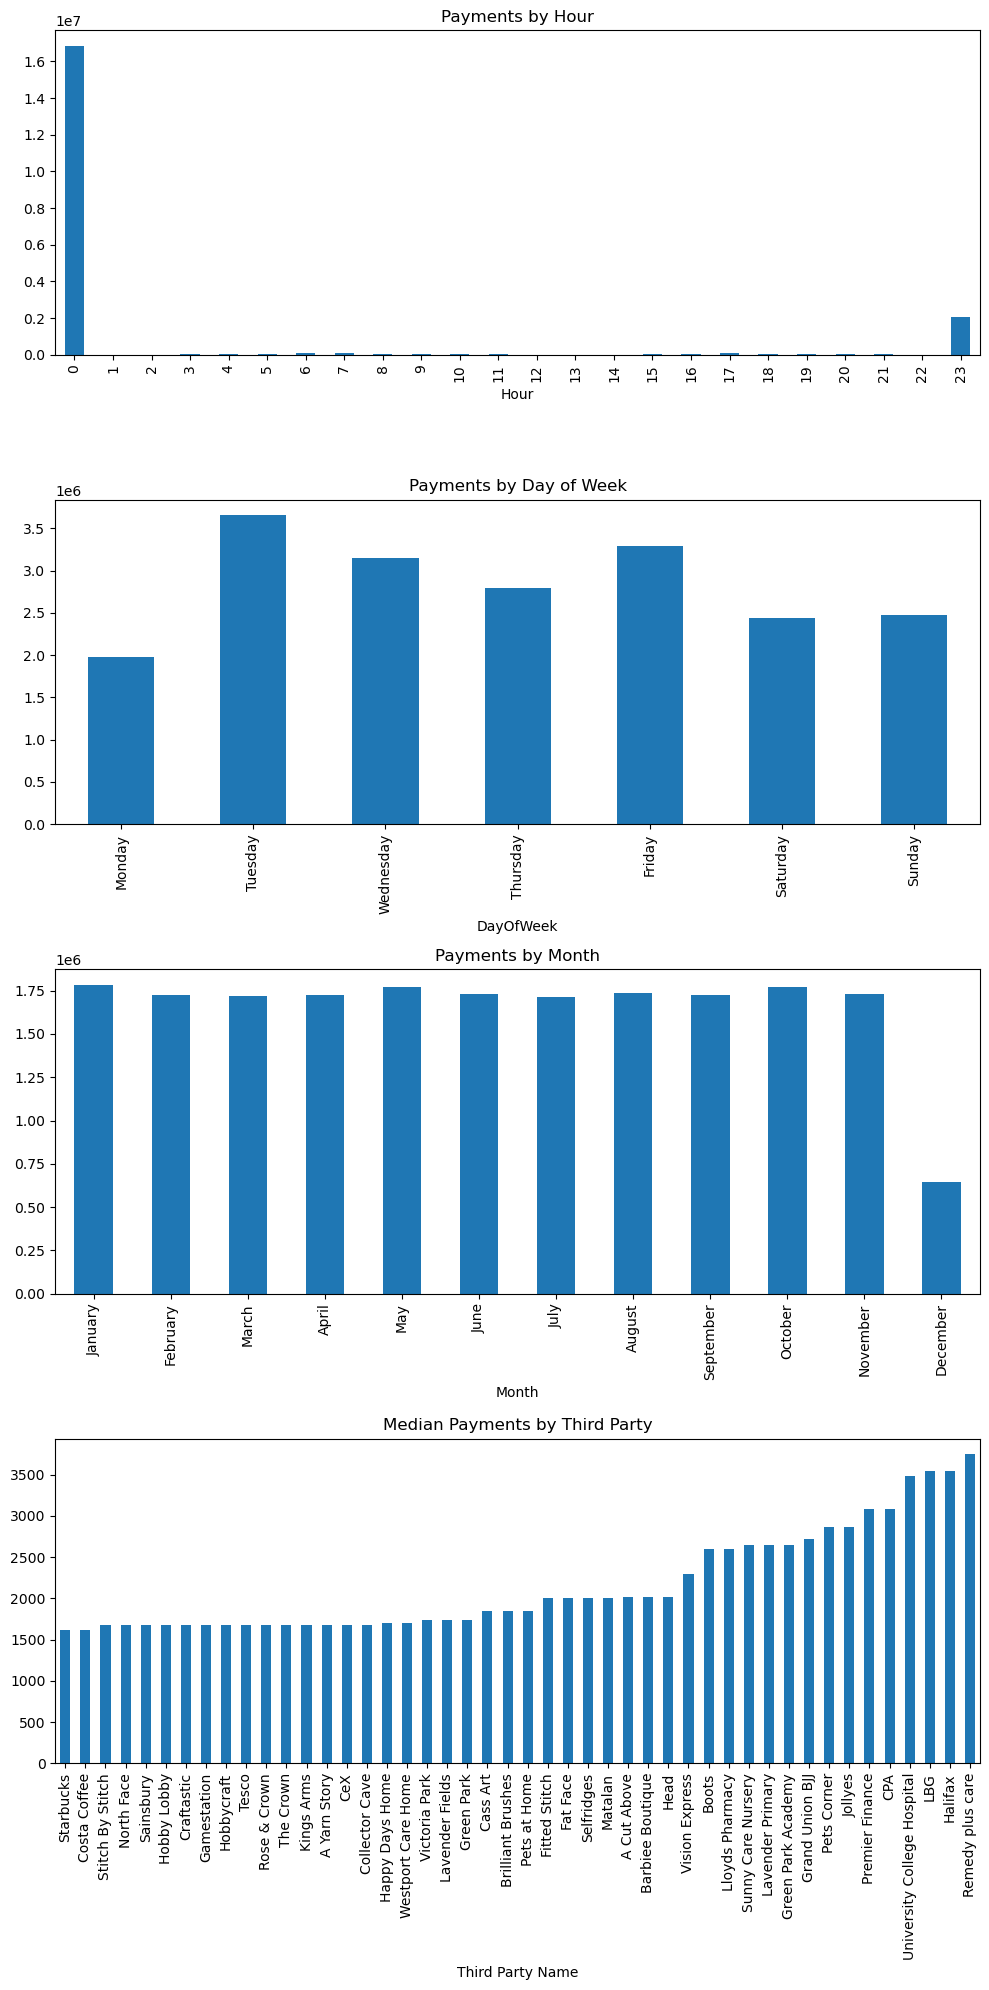

In [28]:
# Ensure 'Datetime' is in the correct format for analysis
payments_df['Datetime'] = pd.to_datetime(payments_df['Datetime'])
payments_df['Date'] = pd.to_datetime(payments_df['Date'], dayfirst=True)
payments_df['Hour'] = payments_df['Datetime'].dt.hour
payments_df['DayOfWeek'] = payments_df['Datetime'].dt.day_name()
payments_df['Month'] = payments_df['Datetime'].dt.month_name()

# Conducting EDA with visualisations on the payments dataset

# Payments by Hour
payments_by_hour = payments_df.groupby('Hour')['Amount'].sum()

# Payments by Day of the Week
payments_by_day = payments_df.groupby('DayOfWeek')['Amount'].sum().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# Payments by Month
payments_by_month = payments_df.groupby('Month')['Amount'].sum().reindex(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

# Median Payments by Third Party
median_payments_third_party = payments_df.groupby('Third Party Name')['Amount'].median().sort_values()


# Visualising the analysis
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

payments_by_hour.plot(kind='bar', ax=axs[0], title='Payments by Hour')
payments_by_day.plot(kind='bar', ax=axs[1], title='Payments by Day of Week')
payments_by_month.plot(kind='bar', ax=axs[2], title='Payments by Month')
median_payments_third_party.plot(kind='bar', ax=axs[3], title='Median Payments by Third Party')

plt.tight_layout()
plt.show()




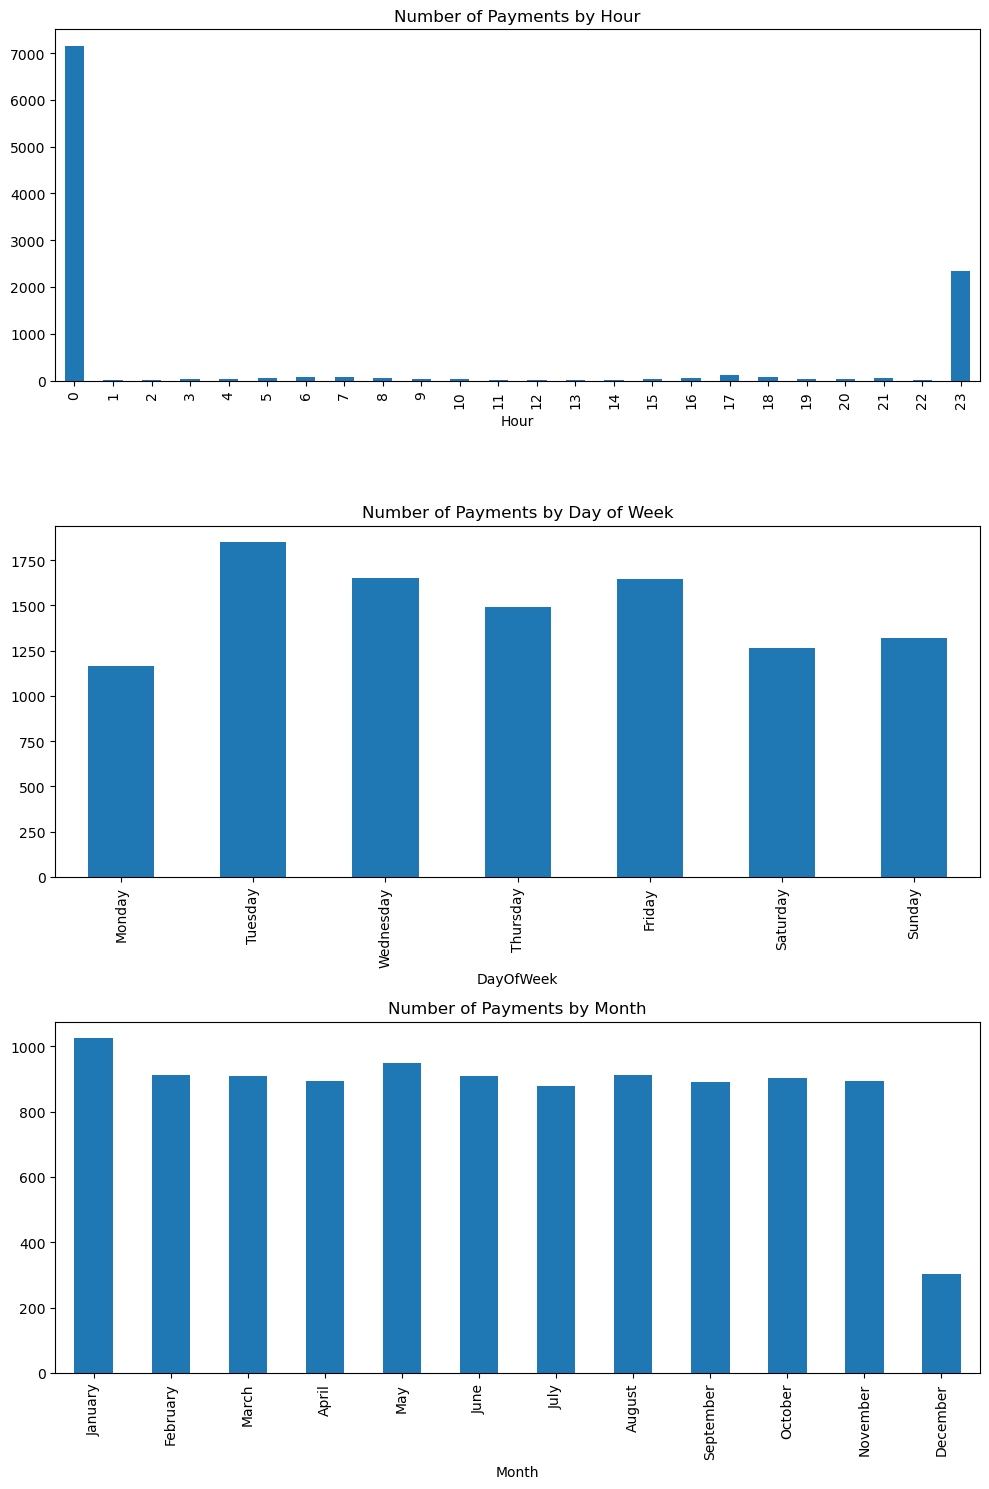

In [29]:
payments_by_hour_count = payments_df.groupby('Hour').size()
payments_by_day_count = payments_df.groupby('DayOfWeek').size().reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
payments_by_month_count = payments_df.groupby('Month').size().reindex(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

# Visualizing the number of transactions
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

payments_by_hour_count.plot(kind='bar', ax=axs[0], title='Number of Payments by Hour')
payments_by_day_count.plot(kind='bar', ax=axs[1], title='Number of Payments by Day of Week')
payments_by_month_count.plot(kind='bar', ax=axs[2], title='Number of Payments by Month')

plt.tight_layout()
plt.show()


Initial notes:
- Could be an idea to split into 2 dataframe: income (+) and expenditures(-). 
- at 11.59/00.00 on the first of each months could be when direct debits occur eg. monthly income, monthly rent, gym memberships?
- we can see an initial story that on the first at timestamp 0:00 we see an income, a transfer out of the employee (rent) and an income to that account (maybe landlord?)
- on the first we also see a lot of payments going out to halifax, LBG. Could be monthly mortgage/loan repayments
-  then there are monthly subscriptions: Puregym, Disney, Mojang studios, Xbox, Blizzard, SquareOnix, Netflix, Amazon, Grand Union BJJ
- then spending starts

Industries:
- pubs: The Crown, Rose & Crown
- food shops (supermarkets): Tesco, Sainsbury, Sainsbury Local
